In [37]:
# importing libraries
import numpy as np
import pandas as pd

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# import csv file
df = pd.read_csv('crops_data_nonzero_protein.csv')
df.head()
# plant names
names = df['Name']
protein = df['Protein']
carbs = df['Carbs']
# selecting only numeric features for the model
feature = df[['Temp_1', 'Temp_2', 'Temp_3', 'Temp_4','Protein']]
feature.head()

,Temp_1,Temp_2,Temp_3,Temp_4,Protein
0,20,30,12,35,60
1,22,30,16,36,83
2,20,30,10,35,93
3,24,32,10,40,86
4,20,32,7,42,83


In [40]:
carbs.head

<bound method NDFrame.head of 0       165
1       136
2       206
3       226
4       154
5       150
6       112
7       147
8       264
9       125
10      240
11      217
12      202
13      264
14      113
15      234
16      105
17      224
18      283
19      236
20      146
21      229
22      148
23      110
24      175
25      209
26      113
27      267
28      221
29      170
       ... 
1942    116
1943    271
1944    128
1945    280
1946    297
1947    158
1948    185
1949    251
1950    199
1951    219
1952    182
1953    162
1954    153
1955    121
1956    254
1957    255
1958    284
1959    198
1960    108
1961    142
1962    226
1963    147
1964    133
1965    266
1966    212
1967    232
1968    145
1969    279
1970    223
1971    239
Name: Carbs, Length: 1972, dtype: int64>

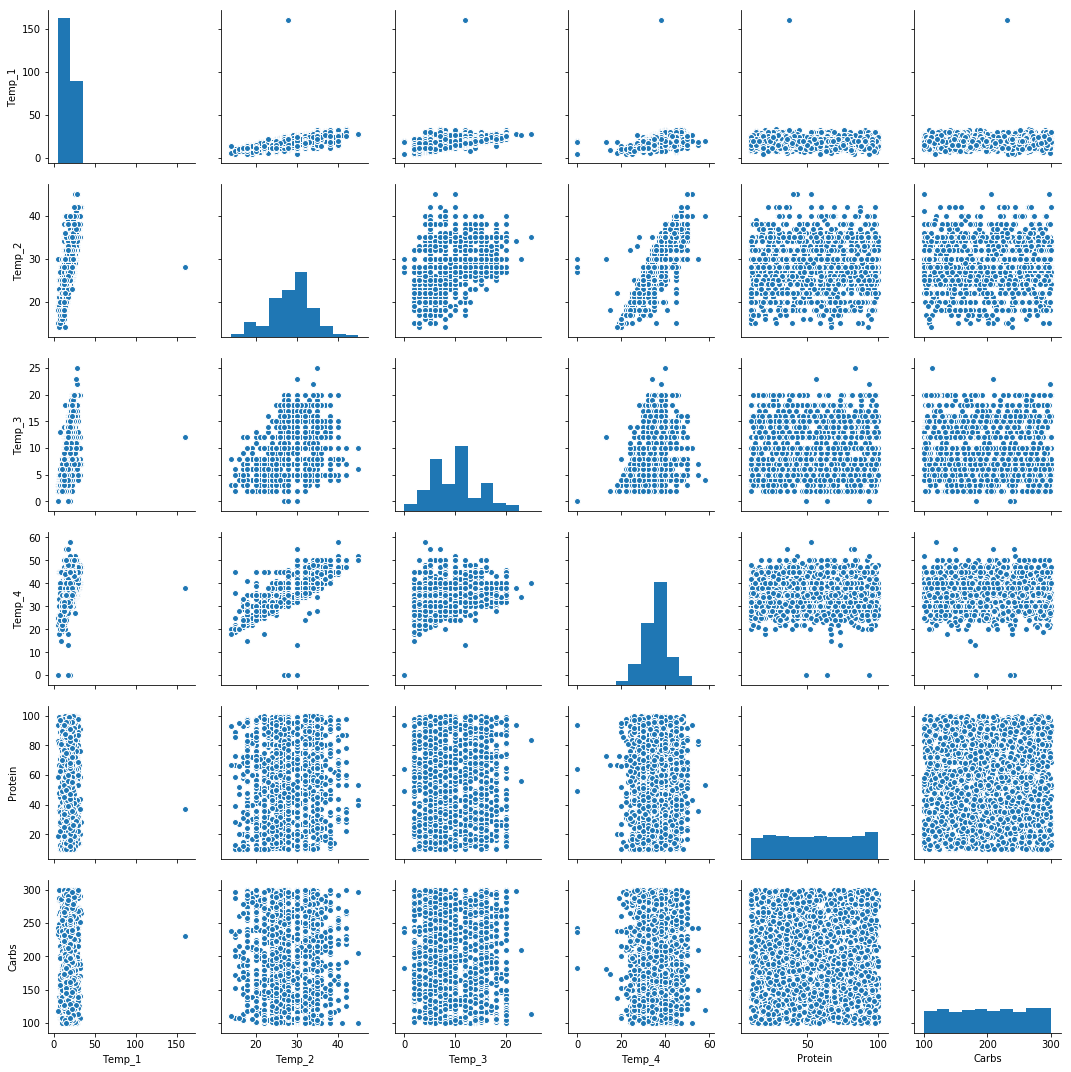

In [41]:
# visualize the data_set
sns.pairplot(df)
plt.show()


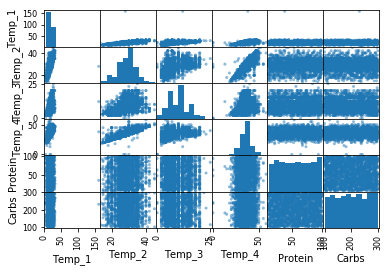

In [42]:
pd.plotting.scatter_matrix(df)
plt.show()

In [43]:
# import TSNE estimator
from sklearn.manifold import TSNE

In [44]:
# convert data to ndarray for TSNE
X = np.array(feature)

In [45]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [46]:
X_embedded.shape

(1972, 2)

In [47]:
# plot the results in 2-D
# plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=1,color = 'red')
# plt.show()

In [48]:
# plotly plots
import plotly
plotly.__version__

'2.3.0'

In [49]:
# creating plotly graph
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='shafay07', api_key='ttxl6ah6pyBEnsfZG394')

In [50]:
# Create a trace for 2-d
trace = go.Scatter(
    x = X_embedded[:,0],
    y = X_embedded[:,1],
    mode = 'markers',
)

data = [trace]

# Plot and embed in ipython notebook!
plot_url = py.plot(data, filename='t-sne_data_crops')

In [51]:
# 3-D plot
trace2 = go.Scatter3d(
    x = X_embedded[:,0],
    y = X_embedded[:,1],
    z = carbs, #target values
    mode='markers+text',
    hovertext=names,
    marker=dict(
        size=12,
        color = carbs, # set color to an array/list of desired values
        colorscale='Viridis', # choose a colorscale
        opacity=0.5
    )
)

data = [trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter_crops_nonzero_protein1')